# Employee_Attrition_Prediction

**Objective:**
- To identify the different factors that drive attrition in McCurr Health Consultancy
- To build a model to predict if an employee will attrite or not

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset

df = pd.read_excel('HR_Employee_Attrition_Dataset.xlsx')

In [3]:
# C first 5 records
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Let us see the info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

**Observations:**

- There are 2940 observations and 34 columns in the dataset.
- All the columns have 2940 non-null values, i.e., there are no missing values in the data.

In [5]:
# Checking the count of unique values in each column
df.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

**Observations:**

- Column 'Employeenumber' is an identifier which is unique for each employee and we can drop this column as it would not add any value to our analysis.
- Over18 and StandardHours have only 1 unique value. These columns will not add any value to our model hence we can drop them.
- Over18 and StandardHours have only 1 unique value. We can drop these columns as they will not add any value to our analysis.
- On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

In [6]:
# Dropping the columns

df = df.drop(['EmployeeNumber', 'Over18', 'StandardHours'] , axis = 1)

In [7]:
# Creating numerical columns
num_cols = ['DailyRate', 'Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 
            'YearsAtCompany', 'NumCompaniesWorked', 'HourlyRate', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
            'YearsWithCurrManager', 'TrainingTimesLastYear']

# Creating categorical variables
cat_cols = ['Attrition', 'OverTime', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'JobSatisfaction', 'EnvironmentSatisfaction', 
            'WorkLifeBalance', 'StockOptionLevel', 'Gender', 'PerformanceRating', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus', 'RelationshipSatisfaction']

**Univariate Analysis**

In [8]:
# Checking summary statistics

df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,2940.0,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0
MonthlyRate,2940.0,14313.103401,7116.575021,2094.0,8045.0,14235.5,20462.0,26999.0
PercentSalaryHike,2940.0,15.209524,3.659315,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,2940.0,11.279592,7.779458,0.0,6.0,10.0,15.0,40.0
YearsAtCompany,2940.0,7.008163,6.125483,0.0,3.0,5.0,9.0,40.0
NumCompaniesWorked,2940.0,2.693197,2.497584,0.0,1.0,2.0,4.0,9.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.0,66.0,84.0,100.0


**Observations:**

- Average employee age is around 37 years. It has a high range, from 18 years to 60, indicating good age diversity in the organization.
- At least 50% of the employees live within a 7 KM radius of the organization. However, there are some extreme values, given that the maximum value is 29 km.
- The average monthly income of an employee is USD 6500. It has a high range of values from 1K-20K USD, which is to be expected for any organization's income distribution. There is a big difference between the 3rd quartile value (around USD 8400) and the maximum value (nearly USD 20000), showing that the company's highest earners have a disproportionately large income in comparison to the rest of the employees. Again, this is fairly common in most organizations.
- The average salary hike of an employee is around 15%. At least 50% of employees got a salary hike of 14% or less, with the maximum salary hike being 25%.
- The average number of years an employee is associated with the company is 7.
- On average, the number of years since an employee got a promotion is ~2.19. The majority of employees have been promoted since the last year.

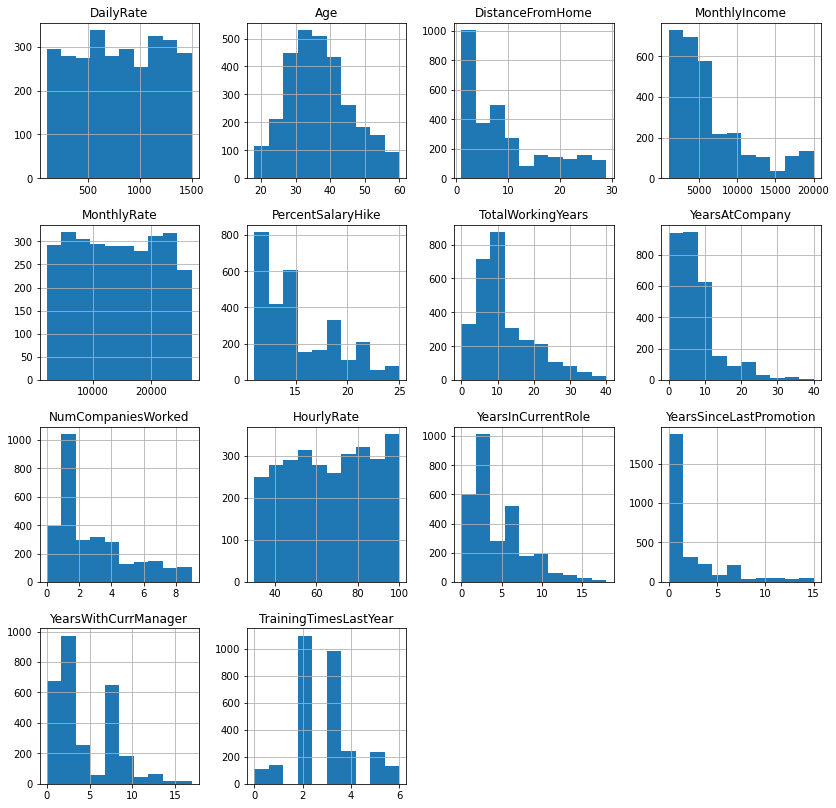

In [9]:
# Creating histograms
df[num_cols].hist(figsize = (14, 14))

plt.show()

**Observations:**

- The age distribution is close to a normal distribution, with the majority of employees between the ages of 25 and 50.
- DistanceFromHome also has a right-skewed distribution, meaning most employees live close to work but there are a few that live further away.
- MonthlyIncome and TotalWorkingYears are skewed to the right, indicating that the majority of workers are in entry / mid-level positions in the organization.
- The percentage salary hike is skewed to the right, which means employees are mostly getting lower percentage salary increaseS.
- The YearsAtCompany variable distribution shows a good proportion of workers with 10+ years, indicating a significant number of loyal employees at the organization.
- The YearsInCurrentRole distribution has three peaks at 0, 2, and 7. There are a few employees that have even stayed in the same role for 15 years and more.
- The YearsSinceLastPromotion variable distribution indicates that some employees have not received a promotion in 10-15 years and are still working in the organization. These employees are assumed to be high work-experience employees in upper-management roles, such as co-founders, C-suite employees, etc.
- The distributions of DailyRate, HourlyRate, and MonthlyRate appear to be uniform and do not provide much information. It could be that the daily rate refers to the income earned per extra day worked while the hourly rate could refer to the same concept applied for extra hours worked per day. Since these rates tend to be broadly similar for multiple employees in the same department, that explains the uniform distribution they show.

**Univariate analysis for categorical variables**

In [10]:
# Printing the % sub categories of each category.
for i in cat_cols:
    
    print(df[i].value_counts(normalize = True))
    
    print('*' * 40)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64
****************************************
No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64
****************************************
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64
****************************************
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64
****************************************
3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: Education, dtype: float64
****************************************
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64
****************************************
4    0.312245
3    0.300680
1    0.196599
2    0.

**Observations:**

- The employee attrition rate is 16%.
- Around 28% of the employees are working overtime. This number appears to be on the higher side and might indicate a stressed employee's work-life.
- 71% of the employees have traveled rarely, while around 19% have to travel frequently.
- Around 73% of the employees come from an educational background in the Life Sciences and Medical fields.
- Over 65% of employees work in the Research & Development department of the organization.
- Nearly 40% of the employees have low (1) or medium (2) job satisfaction and environment satisfaction in the organization, indicating that the morale of the company appears to be somewhat low.
- Over 30% of the employees show low (1) to medium (2) job involvement.
- Over 80% of the employees either have none or very less stock options.
- In terms of performance ratings, none of the employees have been rated lower than 3 (excellent). About 85% of employees have a performance rating equal to 3 (excellent), while the remaining have a rating of 4 (outstanding). This could either mean that the majority of employees are top performers, or the more likely scenario is that the organization could be highly lenient with its performance appraisal process.

**Bivariate and Multivariate analysis**

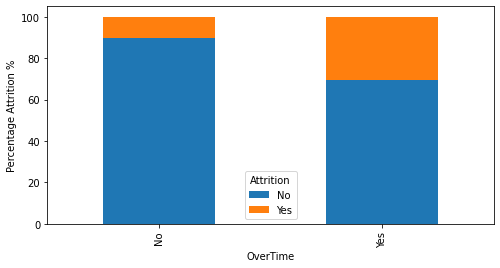

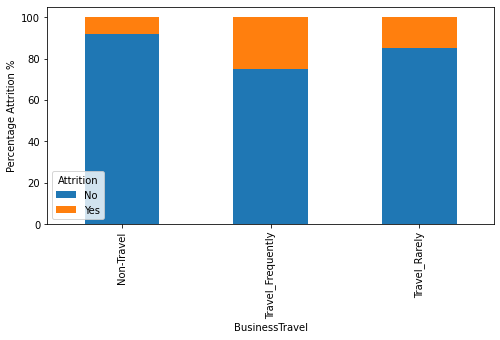

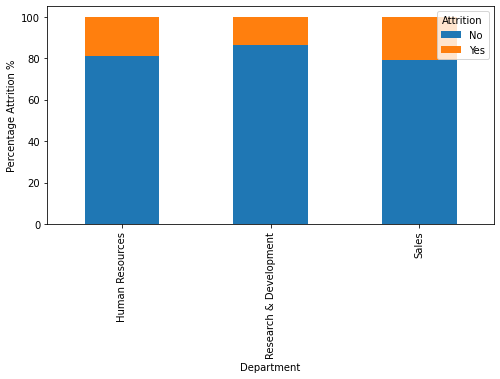

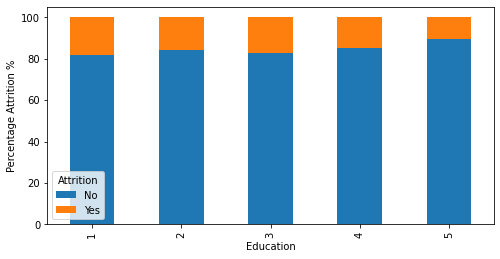

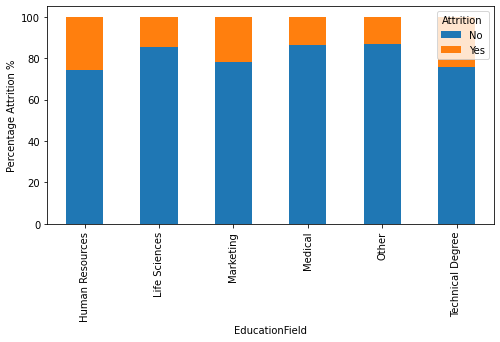

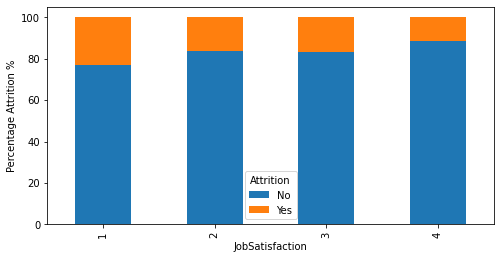

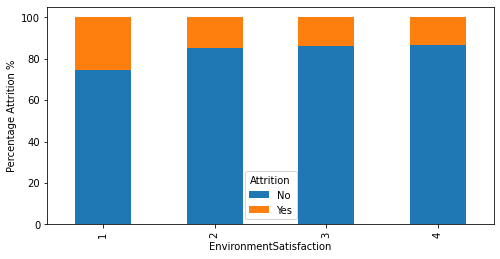

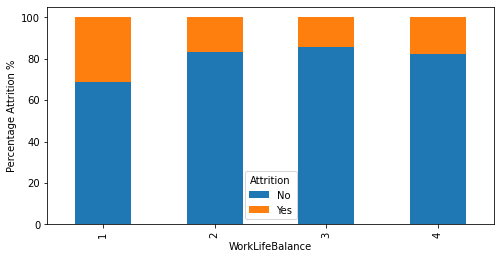

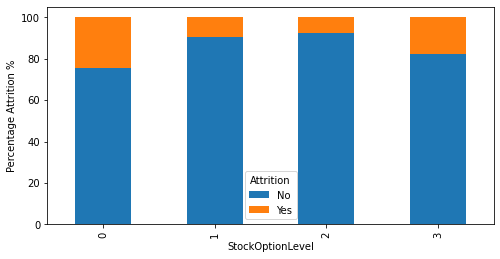

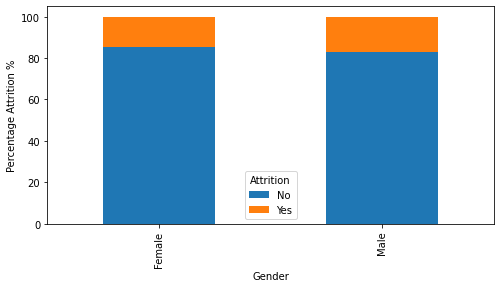

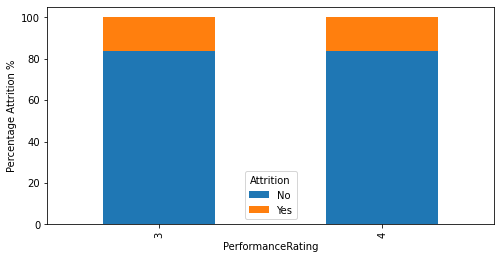

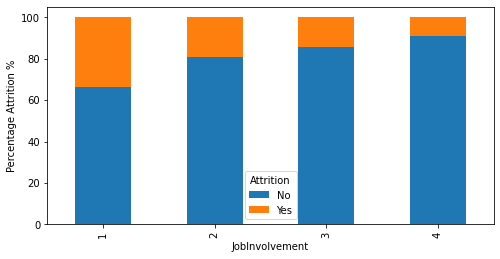

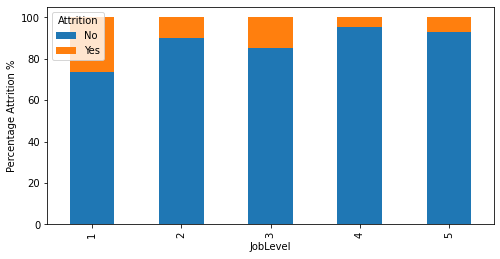

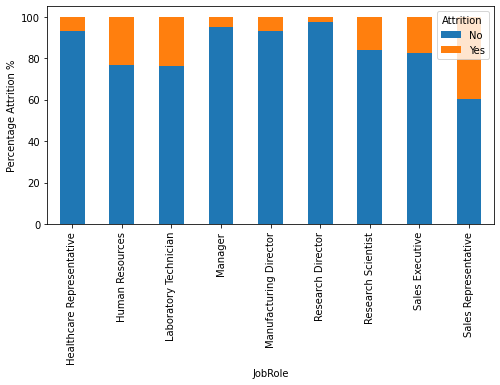

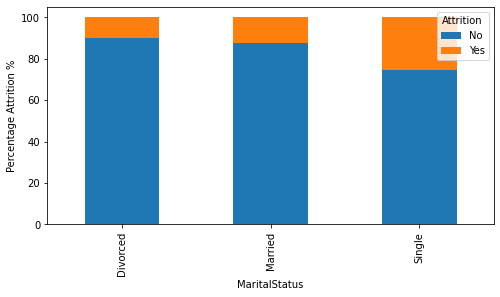

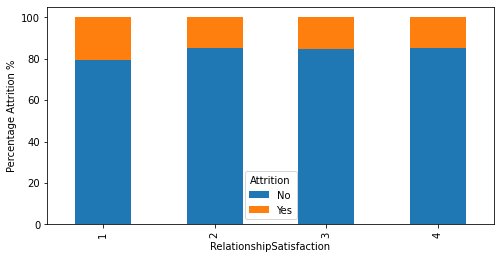

In [11]:
# We have analyzed different categorical and numerical variables. 
# Checking how does attrition rate is related with other categorical variables

for i in cat_cols:
    if i != 'Attrition':
        (pd.crosstab(df[i], df['Attrition'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage Attrition %')

**Observations:**

- Employees working overtime have more than a 30% chance of attrition, which is very high compared to the 10% chance of attrition for employees who do not work extra hours.
- As seen earlier, the majority of employees work for the R&D department. The chance of attrition there is ~15%
- Employees working as sales representatives have an attrition rate of around 40% while HRs and Technicians have an attrition rate of around 25%. The sales and HR departments have higher attrition rates in comparison to an academic department like Research & Development, an observation that makes intuitive sense keeping in mind the differences in those job profiles. The high-pressure and incentive-based nature of Sales and Marketing roles may be contributing to their higher attrition rates.
- The lower the employee's job involvement, the higher their attrition chances appear to be, with 1-rated JobInvolvement employees attriting at 35%. The reason for this could be that employees with lower job involvement might feel left out or less valued and have already started to explore new options, leading to a higher attrition rate.
- Employees at a lower job level also attrite more, with 1-rated JobLevel employees showing a nearly 25% chance of attrition. These may be young employees who tend to explore more options in the initial stages of their careers.
- A low work-life balance rating leads employees to attrite; ~30% of those in the 1-rated category show attrition.

In [12]:
# Analysing the relationship between attrition and other Numerical variables

# The mean of numerical variables grouped by attrition
df.groupby(['Attrition'])[num_cols].mean()

,DailyRate,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,NumCompaniesWorked,HourlyRate,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear
Attrition,,,,,,,,,,,,,,
No,812.504461,37.561233,8.915653,6832.739659,14265.779400,15.231144,11.862936,7.369019,2.645580,65.952149,4.484185,2.234388,4.367397,2.832928
Yes,750.362869,33.607595,10.632911,4787.092827,14559.308017,15.097046,8.244726,5.130802,2.940928,65.573840,2.902954,1.945148,2.852321,2.624473


**Observations:**

- Employees attriting the company have a nearly 30% lower average income and 30% lesser work experience than those who are not. - These could be the employees looking to explore new options and/or increase their salary with a company switch.
- Employees showing attrition also tend to live 16% further from the office than those who are not. The longer commute to and from work could mean they have to spend more time/money every day, and this could be leading to job dissatisfaction and wanting to leave the organization.

<AxesSubplot:>

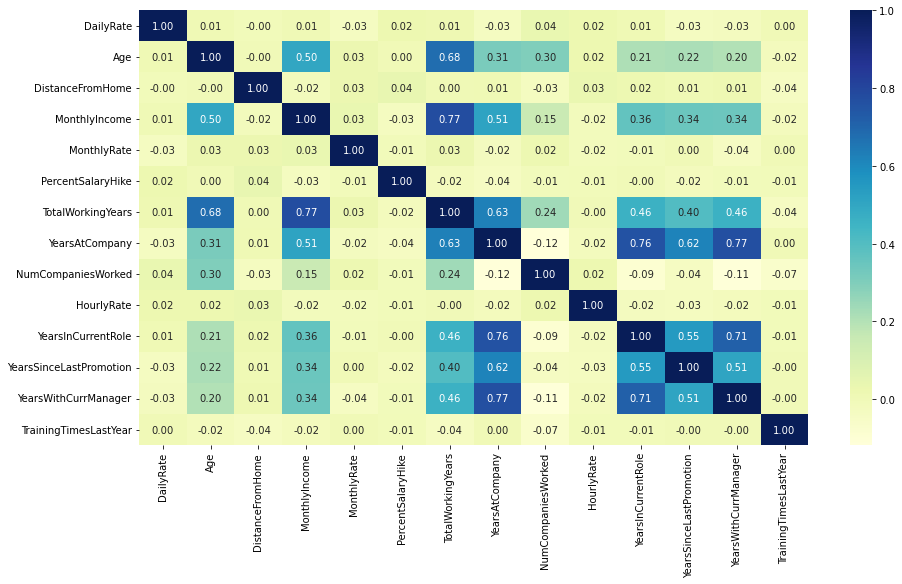

In [13]:
# Plotting the correlation between numerical variables

plt.figure(figsize = (15, 8))
sns.heatmap(df[num_cols].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')

**Observations:**

- Total work experience, monthly income, years at the company, and years with the current managers are highly correlated with each other, and with employee age which is easy to understand as these variables show an increase with age for most employees.
- Years at the company and years in the current role are correlated with years since the last promotion which means that the company is not giving promotions at the right time.

**Data Preparation**

In [14]:
# Encoding Categorical variable 

# Creating a list of columns for which we will create dummy variables
to_get_dummies_for = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'JobRole']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)      

# Mapping overtime and attrition
dict_OverTime = {'Yes': 1, 'No': 0}
dict_attrition = {'Yes': 1, 'No': 0}

df['OverTime'] = df.OverTime.map(dict_OverTime)
df['Attrition'] = df.Attrition.map(dict_attrition)

In [15]:
# Separating the target variable and other variables

Y = df.Attrition

X = df.drop(['Attrition'], axis = 1)

In [16]:
# Splitting the data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

**Function to evaluate Model Performance**

In [17]:
# Creating metric function

def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Attriate', 'Attriate'], yticklabels = ['Not Attriate', 'Attriate'])
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [18]:
# Creating function to compute different metrics to check classification model performance

def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    
    predictors: independent variables
    
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    
    precision = precision_score(target, pred, average = 'macro')              # To compute precision
               
    acc = accuracy_score(target, pred)                                 # To compute accuracy score
    

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        
        index = [0],
    )

    return df_perf

**Building Models**

**Decision Tree Classifier**

In [19]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

In [20]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00       332

    accuracy                           1.00      2058
   macro avg       1.00      1.00      1.00      2058
weighted avg       1.00      1.00      1.00      2058



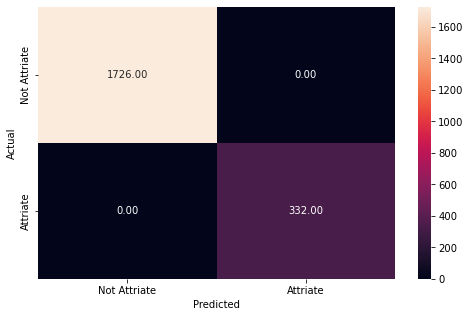

In [21]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       740
           1       0.77      0.85      0.81       142

    accuracy                           0.93       882
   macro avg       0.87      0.90      0.88       882
weighted avg       0.94      0.93      0.94       882



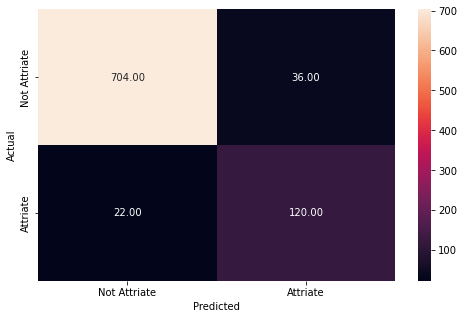

In [22]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [23]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.869464,0.898211,0.93424


**Observations:**

- The Decision Tree works well on the training data but not so well on the test data as the recall is 0.83 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.
- The precision on the test data suggests that there's a 25% (1 - 0.75) chance that the model will predict that a person is going to leave even though he/she would not, and the company may waste their time and energy on these employees who are not at risk of attrition.

<AxesSubplot:xlabel='Importance'>

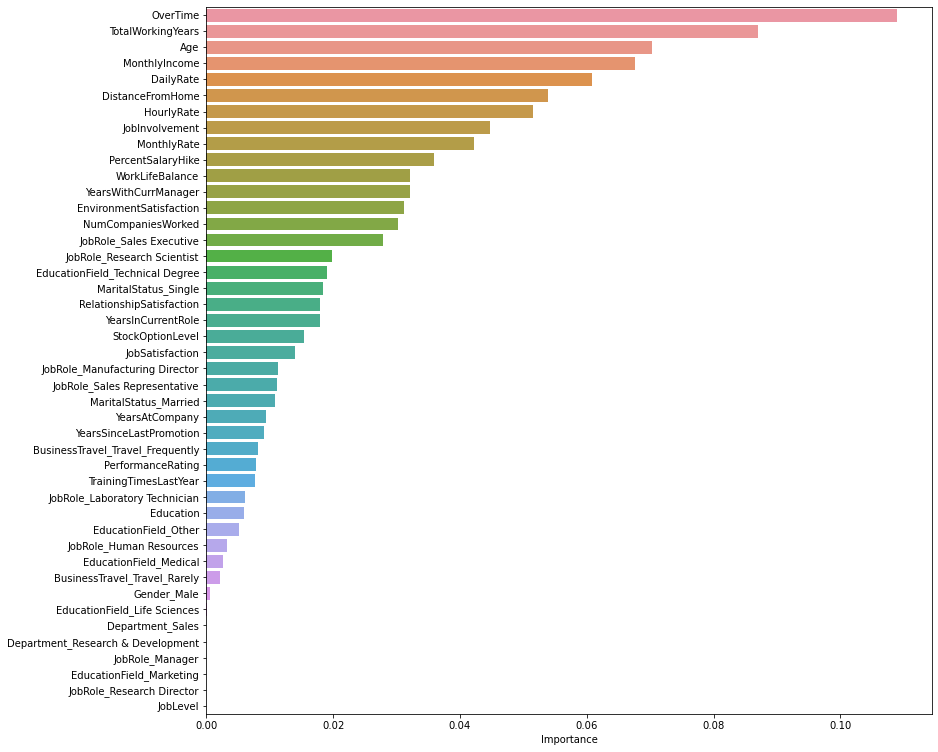

In [24]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

**Observations:**

- According to the Decision Tree, Overtime is the most important feature, followed by Age, total working years, and Monthly income.
- This might signify that people who are at risk of attrition have low income, are doing overtime and have less experience.
- The other important features are DailyRate, DistanceFromHome, JobInvolvement, and PercentSalaryHike.

**Decision Tree - Hyperparameter Tuning**

In [25]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=2,
                       min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1726
           1       0.32      0.68      0.43       332

    accuracy                           0.71      2058
   macro avg       0.62      0.70      0.62      2058
weighted avg       0.82      0.71      0.75      2058



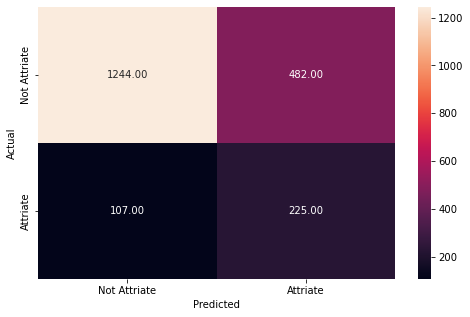

In [26]:
# Checking performance on the training dataset

y_train_pred_dt = dtree_estimator.predict(x_train)
metrics_score(y_train, y_train_pred_dt)

**Observation:**

- In comparison to the model with default values of hyperparameters, the performance on the training set has gone down significantly. This makes sense because we are trying to reduce overfitting.

In [27]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.597186,0.661743,0.695011


**Observations:**

- The tuned model is not performing well in comparison to the model with default values of hyperparameters.
- This model is not overfitting the training data and giving approximately the same result on the test and train datasets.
- Precision has gone down significantly from .75 to .29 in comparison to the previous model which means the tuned model will give a high number of false positives, i.e., this model will predict the employee is going to leave even if they won't, and this will cost time and effort to the company.

<AxesSubplot:xlabel='Importance'>

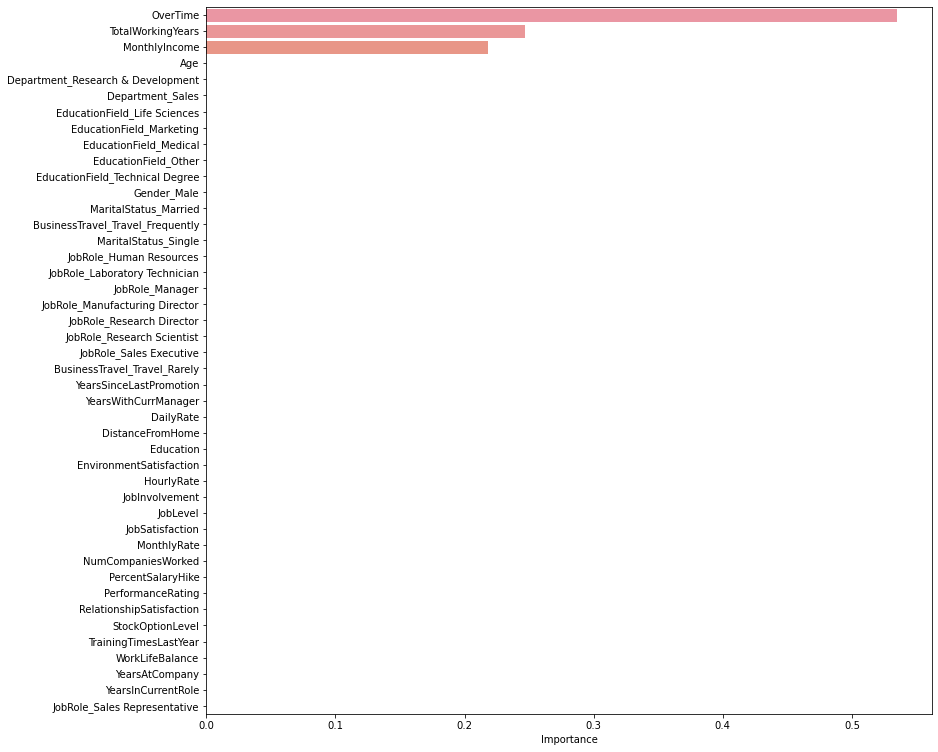

In [28]:
# Plot of feature importance

importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Observations:**

- After tuning the model we are getting that only 3 features are important. It seems like the model is having high bias, as it has over-simplified the problem and is not capturing the patterns associated with other variables.
- According to this model too, OverTime, TotalWorkingYears, and MonthlyIncome are the 3 most important features that describe why an employee is leaving the organization, which might imply that employees doing overtime may feel that their remuneration is not enough for their efforts.

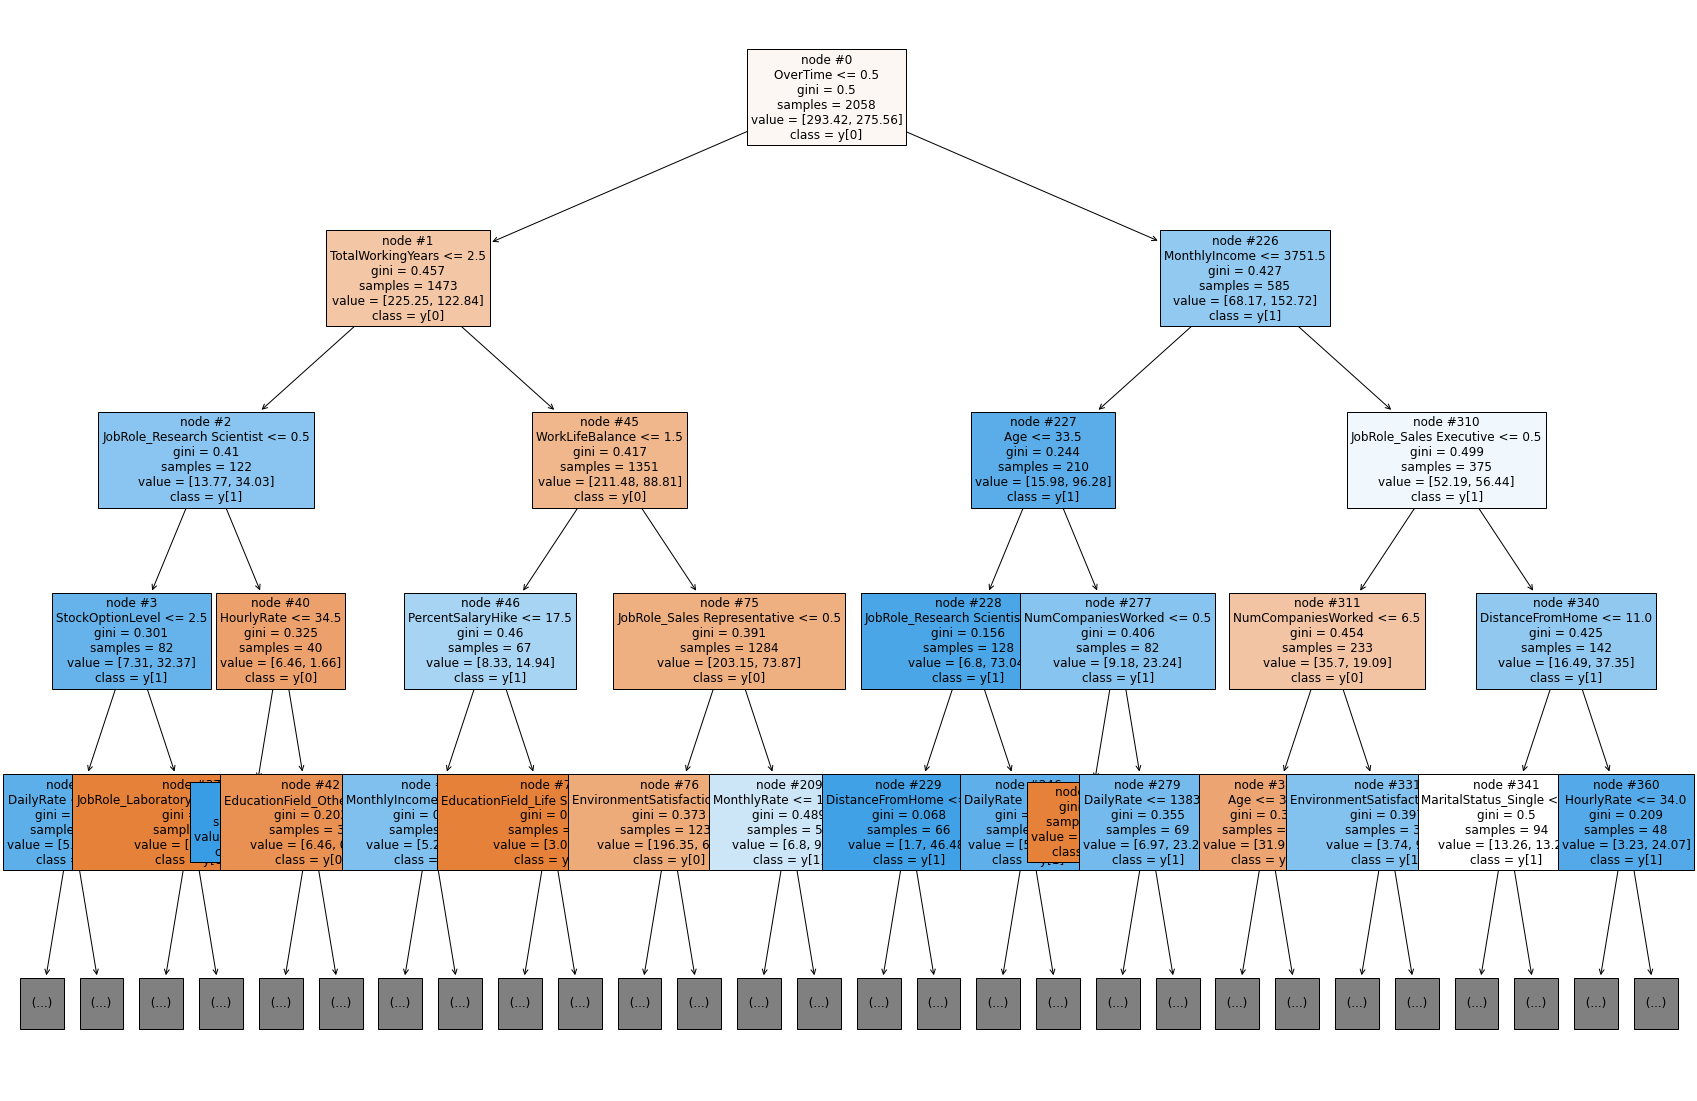

In [29]:
# Tree Plot to a max_depth = 4

features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

**Note:**
**Blue leaves represent the attrition, i.e., y[1] and the orange leaves represent the non-attrition, i.e., y[0]. Also, the more the number of observations in a leaf, the darker its color gets.**

**Observations:**

- Employees who are doing overtime with low salaries and low age have a chance of leaving the company, as they might feel overworked and underpaid and might be looking for better opportunities.
- Employees who are doing overtime with low salaries and are not research scientists have a high chance of attriting.
- Employees, even if they have an income over 3751.5 units but working as sales executives and living far from home have a high chance of attriting.
- Another segment of people are who are doing overtime, with ages younger than 33.5 and not working as research scientists, have a greater chance of attrition. This implies that the model suggests except for the research scientist role, everyone who is young has a high tendency to attrite.
- Employees who have over 2.5 years of work experience but low work-life balance and low percentage hike also tend to attrite, probably as they are seeking a more balanced life.
- Employees who are not doing overtime, have low experience and are working as research scientists have a smaller chance of attriting. These employees are comfortable or loyal to the organization.
- Numcompaniesworked also seems to be an important variable in predicting if an employee's likely to attrite.

**Random Forest Classifier**

In [30]:
# Fitting the Random Forest classifier on the training data

rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00       332

    accuracy                           1.00      2058
   macro avg       1.00      1.00      1.00      2058
weighted avg       1.00      1.00      1.00      2058



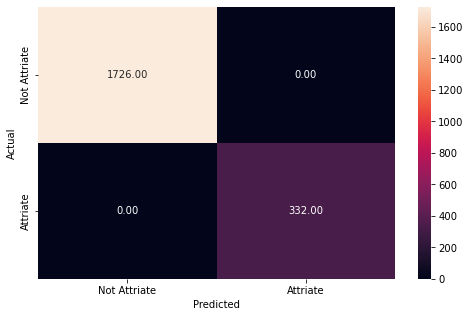

In [31]:
# Checking performance on the training data

y_pred_train_rf = rf_estimator.predict(x_train)
metrics_score(y_train, y_pred_train_rf)

In [32]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.963176,0.891663,0.961451


**Observations:**

- The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only ~ 0.90 for class 1.
- Precision is high for the test data as well.

**Random Forest - HyperParameter Tuning**

In [33]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, max_features=0.9,
                       min_samples_leaf=3, n_estimators=250, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       0.99      1.00      1.00       332

    accuracy                           1.00      2058
   macro avg       1.00      1.00      1.00      2058
weighted avg       1.00      1.00      1.00      2058



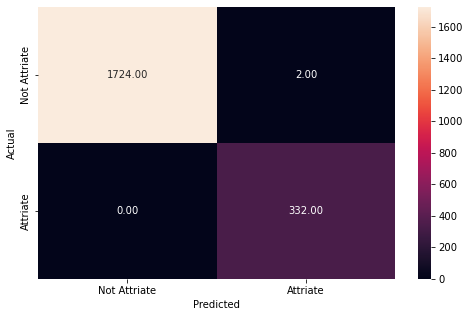

In [34]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

In [35]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.924256,0.904682,0.954649


**Observations:**

- The tuned model is also slightly overfitting the training dataset, but it shows a good performance on the test dataset.
- The recall for class 1 has improved with a small decrease in precision.
- This model is the best-performing one among all the models so far, and is giving us good precision and recall scores on the test dataset.

**Boosting Models**

In [36]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

# Fitting the model
adaboost_model.fit(x_train, y_train)

# Model Performance on the test data
adaboost_model_perf_test = model_performance_classification(adaboost_model,x_test,y_test)


adaboost_model_perf_test

,Precision,Recall,Accuracy
0,0.814518,0.709136,0.884354


In [37]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(x_train, y_train)

# Model Performance on the test data
gbc_perf_test = model_performance_classification(gbc, x_test, y_test)

gbc_perf_test

,Precision,Recall,Accuracy
0,0.882845,0.728483,0.902494


In [38]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(x_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_classification(xgb,x_test,y_test)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.959975,0.911439,0.965986


In [39]:
models_test_comp_df = pd.concat(
    
    [    
    dtree_test.T, dtree_tuned_test.T,rf_estimator_test.T,
    rf_estimator_tuned_test.T, adaboost_model_perf_test.T,
    gbc_perf_test.T, xgb_perf_test.T
    ],
    
    axis = 1,
)

models_test_comp_df.columns = [
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier",
    "Adaboost classifier",
    "Gradientboost classifier",
    "XGBoost classifier"
]

print("Test performance comparison:")

Test performance comparison:


In [40]:
models_test_comp_df

,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier,Adaboost classifier,Gradientboost classifier,XGBoost classifier
Precision,0.869464,0.597186,0.963176,0.924256,0.814518,0.882845,0.959975
Recall,0.898211,0.661743,0.891663,0.904682,0.709136,0.728483,0.911439
Accuracy,0.934240,0.695011,0.961451,0.954649,0.884354,0.902494,0.965986


**Observations:**

- The Tuned Random Forest gives the best performance for this dataset.
- In boosting algorithms, XGBoost has given good score amoong other algorithms.

**Conclusion**

- The best model we have got so far is the tuned random forest model which is giving nearly ~ 83% recall for class 1 on the test data.
- The company should use this model to know beforehand which employee is going to attrite and act accordingly.
- Overtime, MonthlyIncome, DailyRate, number of companies worked, and work experience/age seem to be the most important features.

**Recommendations**

- We saw that working overtime is the most important driver of attrition. The organization should manage their work more efficiently so that employees don't have to work overtime and can manage to have a work-life balance, failing to do this, the company could provide some additional incentives to employees who are working overtime in order to retain them.
- A higher monthly income might lower the odds of an employee attriting. The company should make sure that all its employees are compensated at least based on industry standards.
- As observed earlier, the organization has a lower percentage salary hike and promotions are given less frequently. The company might be able to focus on giving promotions more frequently or they could increase the annual appraisal hike to incentivize employees to stay.
- The organization could come up with a revised CTC plan with stock options for the employees in order to keep them motivated and invested in the company's performance.
- The organization should also modify its hiring policy as people who have worked in many companies and have switched a lot, should not be hired very often.
- Distance from home is also an important factor for attrition. Employees traveling a larger distance to reach the workplace are the ones attriting. For such employees, the company can provide cab facilities so that the commute of employees gets easier.
- The company should also keep track of the hourly rate or the daily rate, so that when the employees need to stay overtime for extra work they are well compensated for that.
- The organization should focus on improving the culture and environment at the workplace by coming up with new ideas to make the environment more open and friendly.
- Keeping track of the problems which employees with lesser experience face and how the management can help them, will create a healthy environment for the young employees.
- The organization should also focus on the employees who are working in sales and marketing, as attrition rate is quite high for these departments. Perhaps the company could look into their incentive schemes and try to come up with new incentive methods to motivate them to stay.